# Week 5 - Fourier transforms

*The perhaps two most important takeaways from this lecture should be:*

1. *The fourier theorem states that **any** function can be represented as an infinite sum of complex exponentials:*
$$x(n) = \sum_{n = - \infty }^{+\infty}x(n) e^{-i \omega n}$$

2. *Euler's identity states that:*\

   a.  A complex exponential can be written as the sum of a cosine and a complex sine*
$$e^{i \theta} = \cos(\theta) + i \sin(\theta)$$
   b.  *Likewise, a cosine \or a sine function can be written as the following sums of complex exponentials*
$$\cos(\theta) = \frac{e^{i \theta} + e^{-i \theta}}{2}, \quad \sin(\theta) = \frac{i(e^{i \theta} - e^{-i \theta})}{2}$$

*Knowing these two things will get you through 99/% of signal processing on a good day. Most of what this is used for in practical terms is the **fourier transform***

$$X(k) = \sum_{n = 0}^{N-1} x(n) e^{-i 2\pi \frac{kn}{N}} \quad \text{DFT (discrete case)}$$

$$X(k) = \int^N_{0} x(t) e^{-i 2\pi t} dt \quad \text{Continuous case (not used in this course)}$$

The (discrete) fourier transform can intuitively be understood in the following way:
1. We input some discrete function f(n) into the fourier transform
2. The values $X(k)$ we get out are amplitudes associated with sinusoidals of specific frequencies, needed to reconstruct the signal
   1. (Rough example): getting $X(1) = 3$ means that the amplitude associated with the freqeuncy $f_k = \frac{k}{N}f_s$ is $3$ where $N$ is the number of samples and $f_s$ is the sampling rate.  
3. Important to note: due to the symmetry of the fourier transform and the nyquist rate, if you have $N$ samples of a digital signal with a sampling rate of $f_s$, you will get $\frac{N}{2}$ different frequencies from the fourier transform, with half being positive frequencies and half being negative frequencies. Typically the postive ones are just removed from plots and such. Also the maximum frequency you will get from the fourier transform is $\frac{f_s}{2}$, so you are in a way automatically insured against aliasing.

## 1 - Fourier transform properties and examples

*This is just to give you a soft intro to how the damn thing actually works in discrete cases*



### Exercise 1.1

*You are given the following discrete signal values, sampled over a duration of $2$ seconds with a sample rate $f_s = 4$*

$$x(n) = [ 0,  1.21, -1,  0.21, 0, -0.21, 1, -1.21]$$

**1. What is the maximum frequency the fourier transform will be able to represent?**

According to the Nyquist rate, we have $f_{max} = \frac{f_s}{2} = \frac{4}{2} = 2$, in reality though, any signal with frequency at exactly $2$ will be seen only as 0's, so it is the technically the supremum of the set $f_k \in [0; 2[$.

**2. What are the specific *frequency bins*, meaning for any $X(k)$ (output from the fourier transform) what specific frequency will that fourier coeffcient correspond to for this specific case?**

ANSWER: Remember, we get the k'th frequency bin by calculating:

$$f_k = \frac{k}{N} \cdot f_s$$

So the specific values will be:

$$\mathbf{f} = [0, 0.5, 1, 1.5, 2]$$

Anything above here will be the negative frequencies, so the same frequencies in reality

**3. Calculate the fourier coefficient corresponding to k = 2**

ANSWER: Here we just use the formula above with the associated values, it is a bit of work though

$$X(2) = (0\cdot\frac{\exp(-(2\cdot 2\cdot i\cdot \pi)\cdot0}{8})) + 1.21\cdot\frac{\exp(-(2\cdot2\cdot i\cdot \pi)}{8}) - 1\cdot\frac{\exp(-(2\cdot2\cdot i\cdot \pi)\cdot2}{8}) + 0.21\cdot\frac{\exp(-(2\cdot2\cdot i\cdot \pi)\cdot 3}{8}) + 0\cdot\frac{\exp(-(2\cdot2\cdot i\cdot \pi)\cdot 4}{8}) - 0.21\cdot\frac{\exp(-(2\cdot2\cdot i\cdot pi)\cdot5}{8}) + 1\cdot\frac{\exp(-(2\cdot 2\cdot i \cdot \pi)\cdot6}{8}) - 1.21\cdot\frac{\exp(-(2\cdot2\cdot i \cdot \pi)\cdot 7}{8}))$$

$$ = 2$$

Which when we then normalize by the amount of samples gives us

$$X(2) = \frac{2}{8} = 0.25$$

And since we need to overlay positive and negative frequencies, we multiply by two:

$$0.25 \cdot 2  = 0.5$$

So we can say that the amplitude associated with the frequency $f_k =  \frac{k}{N} \cdot f_s = \frac{2}{8} \cdot 4 = 1$ is $0.5$ 

COPY this into maple if you just wanna see it there

bs(0*exp(-(2*2*I*Pi)*0/8) + 1.21*exp(-(2*2*I*Pi)/8) - exp(-(2*2*I*Pi)*2/8) + 0.21*exp(-(2*2*I*Pi)*3/8) + 0*exp(-(2*2*I*Pi)*4/8) - 0.21*exp(-(2*2*I*Pi)*5/8) + exp(-(2*2*I*Pi)*6/8) - 1.21*exp(-(2*2*I*Pi)*7/8))

Though you should really be using Python for this

In [39]:
import numpy as np  # Import numpy to use np.exp
from scipy.io.wavfile import read
from IPython.display import Audio
from scipy.signal import stft


def plot_fourier_spectrum():
    pass

def generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])
    return wave

def calculate_fourier_coeffcients(signal_values, sample_rate=1, v=True):

    N = len(signal_values)
    coeffs = []

    # Calculate fourier coefficient for each frequency bin
    for k in range(N):
        # Create values to sum in order to obtain fourier coefficients
        prepared_to_sum = [x_n * np.exp(-2j * np.pi * k * n / N) for n, x_n in enumerate(signal_values)]
        coeffs.append(sum(prepared_to_sum) / N) # Divide by N to normalize frequency values
        
        if v:
            frequency = ((k / N) * sample_rate)
            absolute_coefficient = np.absolute(coeffs[k]) # Get absolute value to remove imaginary parts
            print(f"The fourier coeffcient associated with frequency {frequency}: {absolute_coefficient}")
            if k == N / 2:
                print("############ Frequencies Loop ############")

    return coeffs

### Exercise 1.2

*Far easier it is to create Python functions that calculate the fourier coeffcients for us*

**1. The first of the above two functions generate a sine wave based on a series on input amplitudes, phases, frequencies, sample rates and a duration of the signal. The second should calculate the fourier coefficients of said sine wave. Complete the function to calculate the fourier coefficients.**

**Test your imlpementation using the cell below, you shuold get back the amplitudes associated with each frequency**

**2. Change the values of the sample rate or frequency to see if you can make a signal whose frequencies cannot be accurately represented by the fourier transform**

**3. What do you think happens with the fourier coefficients when the signal contains a frequency that does not correspond to any of the frequency bins?**

In [3]:
frequencies = [0.5, 2] # Change this
amplitudes = [0.5, 1] # Change this
phases = [0, 0, 0] # Change this, remember, the  is in radians

sample_rate = 5 # Example of normal sampling rate for computers: 44.1 Khz
duration = 2

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.0: 7.771561172376097e-17
The fourier coeffcient associated with frequency 0.5: 0.2500000000000001
The fourier coeffcient associated with frequency 1.0: 1.907678490446994e-16
The fourier coeffcient associated with frequency 1.5: 1.0190492755571724e-16
The fourier coeffcient associated with frequency 2.0: 0.49999999999999983
The fourier coeffcient associated with frequency 2.5: 2.590300575551817e-16
############ Frequencies Loop ############
The fourier coeffcient associated with frequency 3.0: 0.5
The fourier coeffcient associated with frequency 3.5: 7.917883021975843e-16
The fourier coeffcient associated with frequency 4.0: 1.7763568394002506e-16
The fourier coeffcient associated with frequency 4.5: 0.24999999999999967


### Exercise 1.3

*In practice, simply being above the nyquist rate isn't everything you need to get the lower frequencies. The amount of samples also has an effect*

**1. Take a look at the below code, the fourier coefficient for the frequency 0.25 has not been found. Why is this?**

**2. How can you change the values of sample_rate and duration to alleviate this problem?**

**3. What would you say is a general rule of sampling when you need to recover both very high and very low frequencies?**

POSSIBLE ANSWER (NOT NECESSARY THE CORRECT ONE):

It is obvious that we should have high sample rates to recover high frequencies, because of the Nyquist rate and all that. But to recover low frequencies, we must make sure to sample the signal long enough that we observe the whole period. If we for example sample with 44100Hz for 1 second, we get 44100 samples, which might seem like a lot, but since we only sample for 1 second, we cannot fully observe a signal with a frequency of 0.25, for example.       

In [4]:
frequencies = [0.25, 2]
amplitudes = [0.5, 1]
phases = [0, 0, 0]

sample_rate = 5
duration = 2

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.0: 0.31568757573375206
The fourier coeffcient associated with frequency 0.5: 0.10877852522924716
The fourier coeffcient associated with frequency 1.0: 0.024065262637628797
The fourier coeffcient associated with frequency 1.5: 0.012261863762639245
The fourier coeffcient associated with frequency 2.0: 0.5000770565674858
The fourier coeffcient associated with frequency 2.5: 0.007919222016226968
############ Frequencies Loop ############
The fourier coeffcient associated with frequency 3.0: 0.500077056567486
The fourier coeffcient associated with frequency 3.5: 0.012261863762639023
The fourier coeffcient associated with frequency 4.0: 0.024065262637628777
The fourier coeffcient associated with frequency 4.5: 0.10877852522924697


## 2 - Properties of the fourier transform




## 3 - Fourier transformations using packages

*As ML enthusiasts, we obviously never implement ourselves what the plebs have already done for us. In this case, scipy already has a rather good FFT implementation*

In [33]:
import numpy as np
import sounddevice as sd # Needed to play sounds
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq # Technically used here is the fast fourier transform because it is... fast, don't convern yourself with this

def sk_fourier_transform(time_signal, duration, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    # idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(signal_freq_bins, (1.0 / N * np.abs(signal_freq)))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


### Exercise 3.1 

*Using the FFT functions from scipy isn't actually **that** simple*

**1. Complete the sk_fourier_transform function to get the fourier coefficients (yf) and the fourier frequency bins (xf) from a given time signal. If you're having trouble, be sure to look up documentation or examples online for this. Test your implementation using the cell below.**

**$\star$ 2. Change the plot_audio_signal function to only plot the positive frequencies, and get the wholly correct value of the amplitudes.**

**3. Test the implementation in cases where there are frequencies that do not fit into frequency bins, and in cases were aliasing is present. How does the fourier spectrum look.**

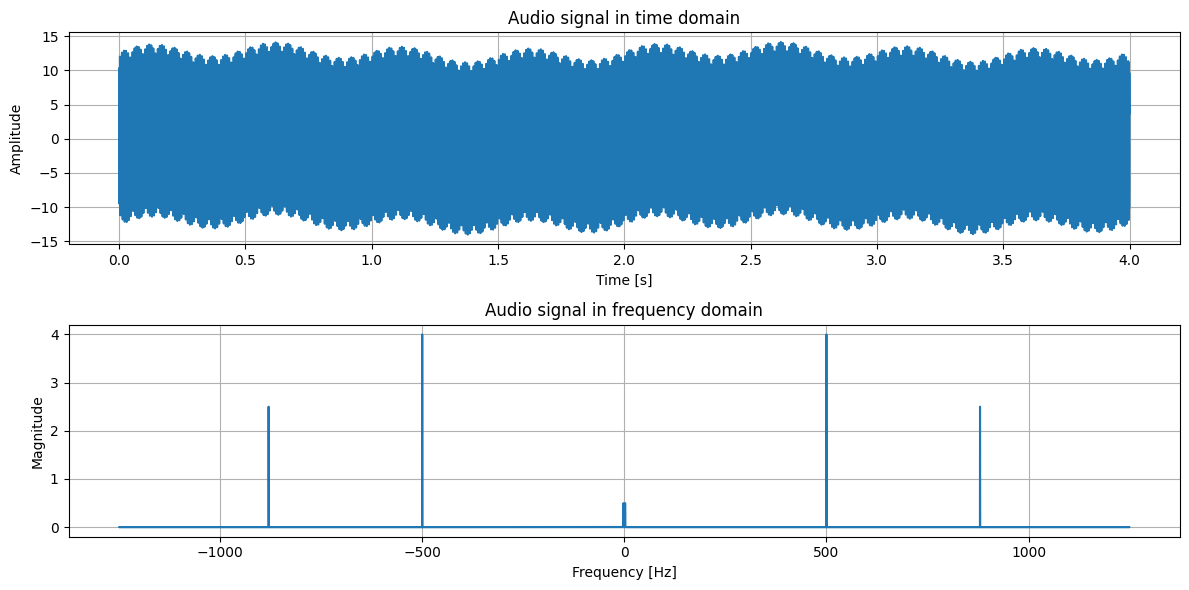

In [18]:
frequencies = [0.5, 2, 0.0005, 880, 7000]
amplitudes = [0.5, 1, 10, 5, 8]
phases = [0, 0, 0, 0, 0] 

sample_rate = 2500
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)

plot_audio_signal(t, time_signal, yf, xf, duration=duration)

### Exercise 3.2

*In real life, we never have noise-free observations, so it is useful to see how noise affects our final signal as well as the fourier spectrum. The below code introduces normal distributed noise to a given signal with the following, common model:*

$$y(n) = s_n + \eta_n  \text{ }|\text{ }  \eta_n \sim \mathcal{N}(0, \sigma)$$

*Where $s_n$ is our signal of interest, $\eta_n$ is the system noise and $y(n)$ is our observed signal*

**1. Complete the implementation to add noise to the observed time signal**

**2. How does the fourier spectrum change when noise is introduced? How are the noise 'frequencies' expressed. Why do you think this is the case?**

**3. Say you got an observed signal with noise as shown below, how could you approach removing the noise to only get the input frequencies out?**

**3.1 Keeping in mind your idea for removing noise, how would increasing the variance of the noise impact this? Try increasing the variance of the noise and see what happens to the "noise frequencies" and the actual frequencies in the fourier spectrum**

**$\star$ 3.2 The variance of the noise is often referred to as the "power" of the noise, why do you supose this is?**

**$\star$ 4. Try changing the mean value of the noise from 0 to add a so called "DC component". What do you think this represents? How is it reflected in the fourier spectrum?**

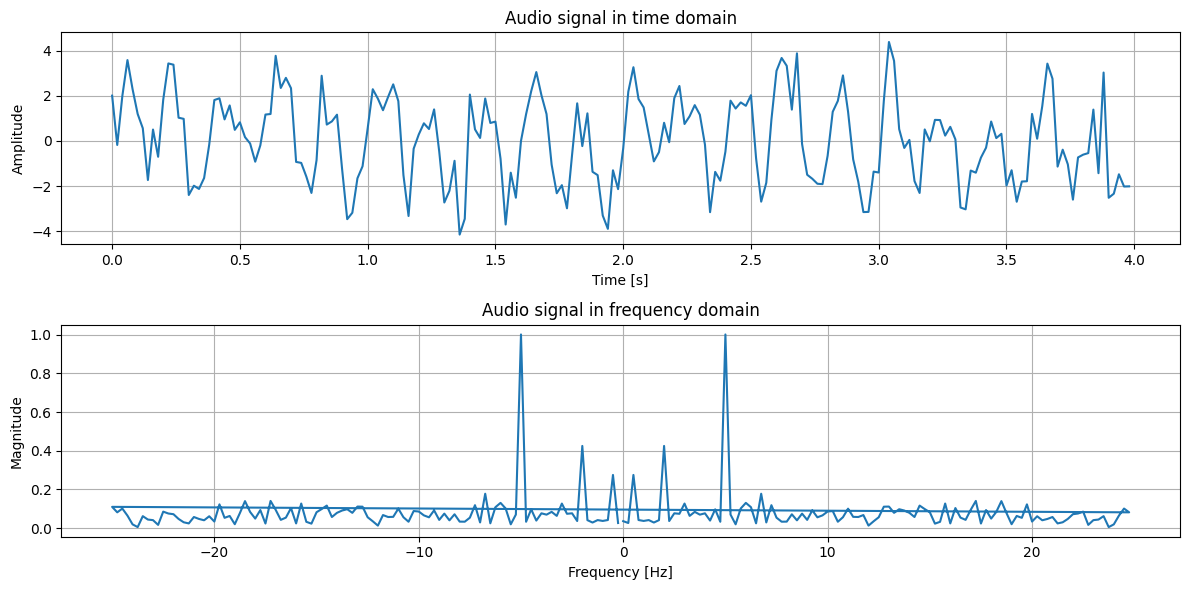

In [37]:
frequencies = [0.5, 2, 5]
amplitudes = [0.5, 1, 2]
phases = [0, 0, 0] 

sample_rate = 50
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

mean = 0 # Change this to introduce a 'dc component' to the noise
variance = 1 # Change this to increase the prescence of the noise

noise = np.random.normal(loc=mean, scale=variance, size=len(time_signal))       

noised_signal = time_signal = noise

xf, yf, t = sk_fourier_transform(noised_signal, duration, sample_rate)

plot_audio_signal(t, noised_signal, yf, xf, duration=duration)

### Exercise 3.3

*As previously mentioned, most of human speech is typically around the 90 - 3500 Hz range. It can be interesting to look at actual voice signals to see how they behave. The cell below loads one of four voice signals spelling out "S O F A"*

1. *A clean signal where only the speech is present*
2. *A signal where white noise has been added in the background*
3. *A signal where non-white noise in the form of a fan has been added*
4. *A signal where non-white noise in the form of human speech has been added*

**1. Load the clean signal and see if you can recognize the difference between consonants and vowels in the time domain, what about the frequency domain?**

**2. Load the different noised signals. How do the different types of noise stand out from one another?**

**3. Play with the function mix_noise to mix different types of noise with the clean signal. What combinations of noise make the clean signal the most unintelligeble from an audio standpoint?**

**3.1 What combinations of noise make the clean signal the most unintelligeble when looking at just the plot of the time and frequency domain**

**4. In general, what types of the presented noise do you think are the most difficult to remove out when the clean signal is human speech?**

In [54]:
# Redefine fourier transform and plot functions because they don't really work when we have signals with set durations
def sk_fourier_transform(time_signal, t, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, time_signal.size / sample_rate, time_signal.size, endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(signal_freq_bins[idx], (2.0 / N * np.abs(signal_freq[idx])))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Sample rate is: 44100Hz


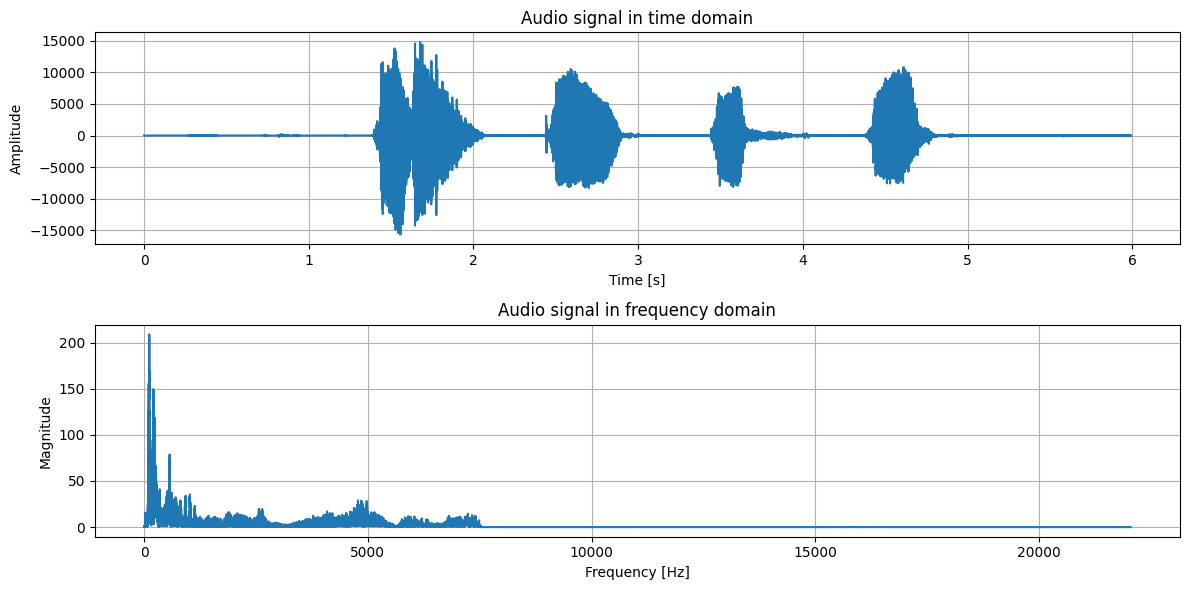

In [60]:
path = "audio/sofa.wav"
# path = "sofa_white_noise.wav"
# path = "sofa_fan_noise.wav"
# path = "sofa_speech_noise.wav"

def mix_noise(noise_paths, noise_amplitudes):
    clean_path = "audio/sofa.wav"
    sample_rate, observed_signal = np.array(read(clean_path)[1:, 0],dtype=float)
    
    for noise_path, noise_amplitude in zip(noise_paths, noise_amplitudes):
        _, noise_signal = np.array(read(noise_path)[1:, 0],dtype=float)[: len(observed_signal-1)]
        observed_signal += noise_signal * noise_amplitude

    return observed_signal

# Perhaps change these paths to have the students make it themselves

sample_rate, time_signal = read("sofa.wav")


time_signal = np.array(time_signal[1:, 0],dtype=float)   # Indexed to make N odd

print(f"Sample rate is: {sample_rate}Hz")

xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)
plot_audio_signal(t, time_signal, yf, xf, duration=duration)
Audio(time_signal,rate = sample_rate)



### Exercise 4 - Reflections on noise

*Noise is present everywhere, but can be circumvented in quite a few cases. The following questions are mostly discussion and reflection questions, there may not be a 'true answer'*

**1. Alice uses her phone to call Bob. Alice's phone signal occupies the frequency range 600MHz to 1GHz (somewhat normal for phones). Charlie is right next to Alice during her call, and is watching a Joe Rogan podcast using Wifi, which he recieves on the frequency band 2.4GHz to 5GHz.**

**1.1 Is the call between Alice and Bob in danger of being cut off? Why/Why not?**

**1.2 Say Charlie *wants* to mess with Alice and Bob by interrupting their call. How could he go about this?**

**2. Reflect on what can cause noise in the following scenarios:**

1. **Talking in a crowded room**
2. **A phone getting wifi signal in a crowded mall**
3. **An alien race sending a signal to earth so NASA can hear it.**

**3. You are an engineer working for the well-known and respected military contractor, Suckheed Fartin (Skibidi Gyattin). Recently, the military has been having issues where nasty people have used radios to send mean messages to the pilots of fighter jets flying missions, this of course makes the pilots very sad, and the military wants a solution.**

**How would you, armed with your newfound knowledge of signal processing, go about solving the issue of these mean messages. For practical purposes, the pilots cannot turn off their radios or change the reciever frequencies on their radios**

## $\star$ Exercise 5 - The Short-Time Fourier transform

*This is just to show what can also be done. There is something called the short time fourier transform (STFT). What this does is split a time signal into a bunch of smaller time intervals, and computes the fourier transform for each smaller interval. Laying all of these FT's in series produces what is known as a spectogram, which you may have already know from Intro to Intelligent systems*

**1. Why would you do this?**

The answer can vary, but the main reason is in use for signals where the frequency content can change quickly. Take for example human speech where the frequency content can change widely depending on what is being said.

Another example (that I am currently working on), is when you have a signal that has been filtered with an unknown signal and need to unfilter it. The STFT lets you amplify or attentuate frequencies on specific timesteps, rather than frequencies over the entire time domain. This lets you have much greater dergree of granularity when doing inverse problems such as that.


**2. How do you implement this?**

Shown below. You need a few more parameters that the regular FT, most of which determine how the different time segments overlap. The 'window' parameter is a kind of filter that determines how one or more time segments overlap, while the nperseg is how many time units is used for each segment. A larger number creates a more 'mean value' for each segment and has smoother transitions, as well as being faster, while a smaller value gives greater granularity in what the frequency content is at a specific timestep, but can vary more and is slower.

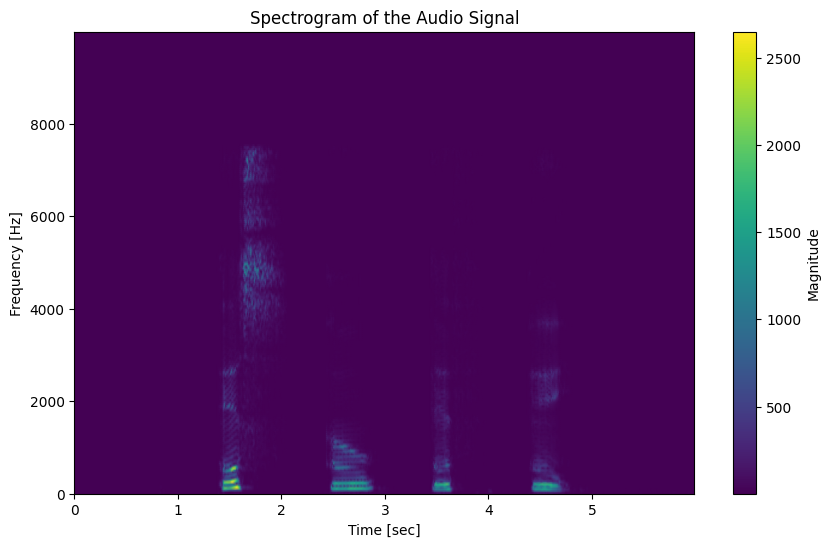

(array([-1.,  0.,  0., ..., 16., 14., 13.]), 44100)

In [97]:
def load_file_and_plot_stft(file_path, max_freq=10000, audio=True, start_duration=None):
    sample_rate, time_signal = read(file_path)

    if start_duration:
        time_signal = time_signal[start_duration[0]*sample_rate: start_duration[0]*sample_rate +  start_duration[1]*sample_rate]

    # Pre-process time signal
    time_signal = np.array(time_signal[1:, 0], dtype=float)  # Indexed to make N odd

    # Perform STFT
    f, t, Zxx = stft(time_signal, fs=sample_rate, nperseg=1024,  window='hann')

    # Filter out the frequencies above the desired range
    freq_mask = f <= max_freq
    f_filtered = f[freq_mask]
    Zxx_filtered = Zxx[freq_mask, :]

    # Plot the spectrogram, here we use pcolormesh, since there is tehnically like three axes
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f_filtered, np.abs(Zxx_filtered), shading='gouraud')
    plt.title('Spectrogram of the Audio Signal')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

    return time_signal, sample_rate



load_file_and_plot_stft('audio/sofa.wav')


**Having such a "clean" audio where there is almost no sound in many places is a big boring to look at, having for example a music clip might be more interesting...**

# Maybe use plt.specgram?

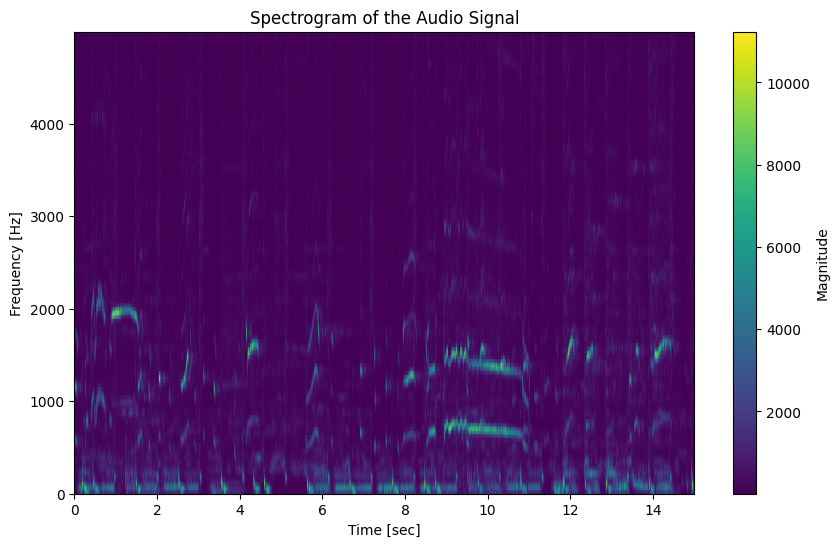

In [104]:
time_signal, sample_rate = load_file_and_plot_stft("audio/good_music.wav", max_freq=5000, start_duration=[30, 15])
Audio(time_signal,rate = sample_rate)
